In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from typing import List

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/svm_data.csv", header=None).rename(columns={0: "x_1", 1: "x_2", 2: "y"})
df

,x_1,x_2,y
0,0.057833,-1.398096,-1
1,0.236386,0.283487,-1
2,-0.819391,0.809699,1
3,1.491693,-1.704607,-1
4,-0.567840,-0.071000,1
5,-0.694414,-0.992279,1
6,0.293799,0.660239,-1
7,-0.813164,1.480960,1
8,-1.503199,0.811566,1
9,0.637056,0.303951,-1


In [3]:
def lagrangian(lambdas, X, y) -> float:
    l = len(lambdas)
    return  1/2 * (sum(lambdas[i] * lambdas[j] * y[i] * y[j] * (X[i] @ X[j]) for j in range(l) for i in range(l))) - sum(lambdas)

In [4]:
X = df.loc[:, "x_1":"x_2"].values
y = df["y"].values
l = len(df)

opfunc = lambda lambdas: lagrangian(lambdas, X, y)

bnds = [(0, None) for _ in range(l)]
cons = {'type': 'ineq', 'fun': lambda lambdas:  sum(lambdas[i] * y[i] for i in range(l))}

var = [0 for _ in range(l)]
optimization = minimize(opfunc, var, bounds=bnds, constraints=cons)

print(optimization)
lambdas = optimization.x

     fun: -3.441730714208997
     jac: array([-0.46216905, -0.46203375,  1.36092249,  3.36185554,  0.46114421,
        0.53619391, -0.41660368,  1.53049895,  3.14465338,  0.57715806,
        3.43520579])
 message: 'Optimization terminated successfully'
    nfev: 183
     nit: 15
    njev: 15
  status: 0
 success: True
       x: array([8.90265966e-01, 2.55146288e+00, 0.00000000e+00, 0.00000000e+00,
       3.44172885e+00, 2.92695579e-15, 4.36058193e-15, 9.74909804e-16,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])


In [5]:
theta = sum(lambdas[i] * y[i] * X[i] for i in range(l))
theta

array([-2.60896928,  0.27700764])

In [6]:
theta0 = np.median([y[i] - (theta @ X[i]) for i in range(l) if lambdas[i] != 0])
theta0

-0.46182108500357877

In [7]:
def a(theta, theta0, X):
    return np.sign(theta @ X + theta0)

In [8]:
clr = [a(theta, theta0, point) for point in X]

In [9]:
x = np.linspace(-1.5, 1.5, 100)
y = - (theta[0]*x + theta0)/theta[1]
y_right = -(theta[0]*x + theta0 + 1) / theta[1]
y_left = -(theta[0]*x + theta0 - 1) / theta[1]

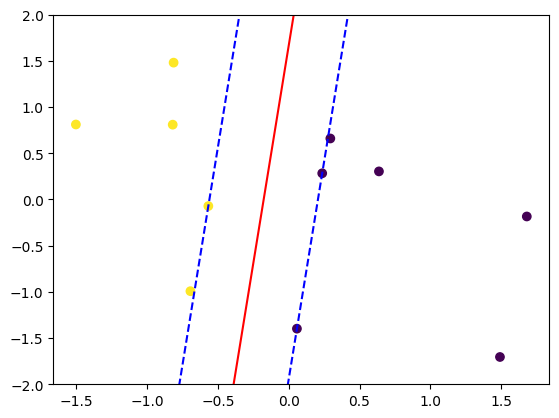

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=clr)
plt.ylim(-2, 2)
plt.plot(x, y, 'r')
plt.plot(x, y_right, 'b--')
plt.plot(x, y_left, 'b--')
plt.show()